# AstroHACK DEMO ALMA

# Start Dask Cluster

In [1]:
from graphviper.dask.client.client import local_client
log_params = {'log_to_term':True,'log_level':'DEBUG','log_to_file':True,'log_file':'/users/jsteeb/astrohack/examples/logs/hack_'}
worker_log_params = {'log_to_term':False,'log_level':'DEBUG','log_to_file':True,'log_file':'/users/jsteeb/astrohack/examples/logs/hack_'}

client = local_client(cores=16,memory_limit='10GB',log_params=log_params,worker_log_params=worker_log_params)
client

2023-04-12 11:42:45,309 - INFO     - astrohack - (client.py:74) - Created client <Client: 'tcp://127.0.0.1:37468' processes=16 threads=16, memory=149.01 GiB>


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 16,Total memory: 149.01 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37468,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 149.01 GiB
Comm: tcp://127.0.0.1:38828,Total threads: 1
Dashboard: http://127.0.0.1:39117/status,Memory: 9.31 GiB
Nanny: tcp://127.0.0.1:43937,


# Create holog_obs_description

In [2]:
from astrohack.extract_holog import extract_holog
import numpy as np
import json
DA = [
    'DA41', 'DA42', 'DA43', 
    'DA44', 'DA45', 'DA46', 
    'DA48', 'DA49', 'DA50', 
    'DA51', 'DA52', 'DA53', 
    'DA54', 'DA55', 'DA56', 
    'DA57', 'DA58', 'DA59'
]
DV = [
    'DV02', 'DV03', 'DV04', 
    'DV11', 'DV12', 'DV13', 
    'DV14', 'DV15', 'DV16', 
    'DV17', 'DV18', 'DV19', 
    'DV20', 'DV21', 'DV22', 
    'DV23', 'DV24', 'DV25'
] 

def gen_holog_obs_description_alma(holog_maps,scans,map_ant_names,ref_ant_names):
    holog_obs_description = {}
    
    for i,holog_map in enumerate(holog_maps):
        holog_obs_description[holog_map]={'scans':np.array([scans[i]])}
        
        holog_obs_description[holog_map]['ant']={}
        for ant_name in map_ant_names:
            holog_obs_description[holog_map]['ant'][ant_name]=np.array(ref_ant_names)
            
    return holog_obs_description


holog_maps = ['map_0','map_1','map_2']
scans = [2,6,10] 
map_ant_names = DV
ref_ant_names = DA
holog_obs_description_0 = gen_holog_obs_description_alma(holog_maps,scans,map_ant_names,ref_ant_names)

holog_maps = ['map_3','map_4','map_5']
scans = [4,8,12] 
map_ant_names = DA
ref_ant_names = DV
holog_obs_description_1 = gen_holog_obs_description_alma(holog_maps,scans,map_ant_names,ref_ant_names)

holog_obs_description = {**holog_obs_description_0,**holog_obs_description_1}
holog_obs_description['ddi'] = np.array([0])
print(json.dumps(holog_obs_description, indent=2, default=str))

{
  "map_0": {
    "scans": "[2]",
    "ant": {
      "DV02": "['DA41' 'DA42' 'DA43' 'DA44' 'DA45' 'DA46' 'DA48' 'DA49' 'DA50' 'DA51'\n 'DA52' 'DA53' 'DA54' 'DA55' 'DA56' 'DA57' 'DA58' 'DA59']",
      "DV03": "['DA41' 'DA42' 'DA43' 'DA44' 'DA45' 'DA46' 'DA48' 'DA49' 'DA50' 'DA51'\n 'DA52' 'DA53' 'DA54' 'DA55' 'DA56' 'DA57' 'DA58' 'DA59']",
      "DV04": "['DA41' 'DA42' 'DA43' 'DA44' 'DA45' 'DA46' 'DA48' 'DA49' 'DA50' 'DA51'\n 'DA52' 'DA53' 'DA54' 'DA55' 'DA56' 'DA57' 'DA58' 'DA59']",
      "DV11": "['DA41' 'DA42' 'DA43' 'DA44' 'DA45' 'DA46' 'DA48' 'DA49' 'DA50' 'DA51'\n 'DA52' 'DA53' 'DA54' 'DA55' 'DA56' 'DA57' 'DA58' 'DA59']",
      "DV12": "['DA41' 'DA42' 'DA43' 'DA44' 'DA45' 'DA46' 'DA48' 'DA49' 'DA50' 'DA51'\n 'DA52' 'DA53' 'DA54' 'DA55' 'DA56' 'DA57' 'DA58' 'DA59']",
      "DV13": "['DA41' 'DA42' 'DA43' 'DA44' 'DA45' 'DA46' 'DA48' 'DA49' 'DA50' 'DA51'\n 'DA52' 'DA53' 'DA54' 'DA55' 'DA56' 'DA57' 'DA58' 'DA59']",
      "DV14": "['DA41' 'DA42' 'DA43' 'DA44' 'DA45' 'DA46' 'DA48' 'DA49

# Extract Holog

In [3]:
from astrohack.extract_holog import extract_holog
holog_mds = extract_holog(
    ms_name='/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3', 
    holog_obs_dict=holog_obs_description,
    data_col='DATA',
    parallel=True,
    overwrite=True
)

2023-04-12 11:42:45,384 - INFO     - astrohack - (_check_parms.py:115) - Setting default holog_name to /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.holog.zarr
2023-04-12 11:42:45,395 - INFO     - astrohack - (_check_parms.py:115) - Setting default point_name to /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.point.zarr
2023-04-12 11:42:45,397 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.holog.zarr will be overwritten.
2023-04-12 11:42:45,399 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.point.zarr will be overwritten.
Successful readonly open of usernoread-locked table /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3/ANTENNA: 8 columns, 36 rows
Successful readonly open of usernoread-locked table /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.spli

In [4]:
holog_mds.summary()

+-------+-------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| ddi   | scan  | antenna                                                                                                                                                                                                                  |
+-------+-------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| ddi_0 | map_4 | ['ant_DA46', 'ant_DA55', 'ant_DA58', 'ant_DA52', 'ant_DA41', 'ant_DA45', 'ant_DA56', 'ant_DA51', 'ant_DA48', 'ant_DA42', 'ant_DA53', 'ant_DA59', 'ant_DA54', 'ant_DA43', 'ant_DA49', 'ant_DA50', 'ant_DA57', 'ant_DA44'] |
| ddi_0 | map_3 | ['ant_DA45', 'ant_DA56', 'ant_DA51

In [5]:
holog_mds['ddi_0']['map_0']['ant_DV21']

<xarray.Dataset>
Dimensions:              (time: 2401, lm: 2, chan: 64, pol: 4)
Coordinates:
  * chan                 (chan) float64 1.09e+11 1.09e+11 ... 1.109e+11 1.11e+11
  * pol                  (pol) <U2 'XX' 'XY' 'YX' 'YY'
  * time                 (time) float64 5.045e+09 5.045e+09 ... 5.045e+09
Dimensions without coordinates: lm
Data variables:
    DIRECTIONAL_COSINES  (time, lm) float64 0.001284 0.001316 ... -0.00131
    VIS                  (time, chan, pol) complex64 0j 0j 0j 0j ... 0j 0j 0j 0j
    WEIGHT               (time, chan, pol) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    antenna_name:         DV21
    ddi:                  0
    holog_map_key:        map_0
    l_max:                0.0012894313800716052
    l_min:                -0.0012894333767786946
    m_max:                0.0013158933808387063
    m_min:                -0.0013132894799647854
    parallactic_samples:  [4.299493989737244, 4.301505759944662, 4.3033042130...
    telescope_name:       ALMA

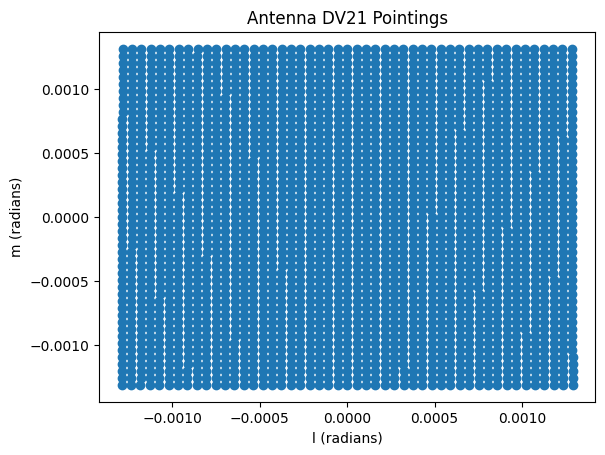

In [6]:
import matplotlib.pyplot as plt
lm_da = holog_mds['ddi_0']['map_0']['ant_DV21'].DIRECTIONAL_COSINES

plt.figure()
plt.scatter(lm_da.isel(lm=0),lm_da.isel(lm=1))
plt.title('Antenna DV21 Pointings')
plt.xlabel('l (radians)')
plt.ylabel('m (radians)')
plt.show()


In [7]:
from astrohack.dio import _load_point_file
point_mds = _load_point_file('/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.point.zarr')
point_mds['ant_DV21']

<xarray.Dataset>
Dimensions:              (time: 60072, az_el: 2, ra_dec: 2)
Coordinates:
  * time                 (time) float64 5.045e+09 5.045e+09 ... 5.045e+09
Dimensions without coordinates: az_el, ra_dec
Data variables:
    DIRECTION            (time, az_el) float64 dask.array<chunksize=(30036, 1), meta=np.ndarray>
    DIRECTIONAL_COSINES  (time, ra_dec) float64 dask.array<chunksize=(30036, 1), meta=np.ndarray>
    ENCODER              (time, az_el) float64 dask.array<chunksize=(30036, 1), meta=np.ndarray>
    POINTING_OFFSET      (time, az_el) float64 dask.array<chunksize=(30036, 1), meta=np.ndarray>
    TARGET               (time, az_el) float64 dask.array<chunksize=(30036, 1), meta=np.ndarray>
Attributes:
    ant_name:       DV21
    mapping_scans:  [{'0': [2, 6, 10]}]

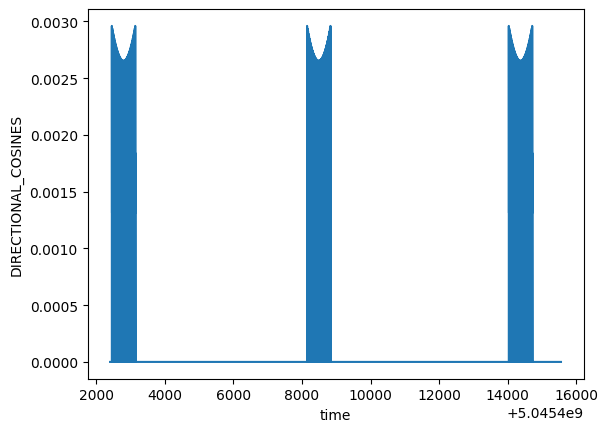

In [8]:
import matplotlib.pyplot as plt
#%matplotlib widget
ant_name = 'ant_DV21'
lm_da = point_mds[ant_name].DIRECTIONAL_COSINES

r = np.sqrt(lm_da.isel(ra_dec=0)**2 + lm_da.isel(ra_dec=1)**2)

plt.figure()
r.plot()

# Holog

In [9]:
from astrohack.holog import holog
import numpy as np
cell_size = np.array([5.3252003e-05, 5.3252003e-05])
grid_size = np.array([49, 49])
grid_interpolation_mode = 'linear' #'nearest', 'linear', 'cubic'

image_mds = holog(holog_name='/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.holog.zarr', padding_factor=50, 
      grid_size=grid_size, cell_size=cell_size, grid_interpolation_mode=grid_interpolation_mode,
      chan_average = True,
      scan_average = True,
      overwrite=True,
      phase_fit=True,
      apply_mask=True,
      to_stokes=True,
      parallel=True
     )

2023-04-12 11:43:46,810 - INFO     - astrohack - (_check_parms.py:115) - Setting default image_file to /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.image.zarr
2023-04-12 11:43:46,812 - INFO     - astrohack - (_check_parms.py:115) - Setting default reference_scaling_frequency to None
2023-04-12 11:43:46,813 - INFO     - astrohack - (_check_parms.py:115) - Setting default ant_list to all
2023-04-12 11:43:46,815 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.image.zarr will be overwritten.
2023-04-12 11:43:46,819 - INFO     - astrohack - (holog.py:135) - Mapping antennas ['ant_DA46', 'ant_DA55', 'ant_DA58', 'ant_DA52', 'ant_DA41', 'ant_DA45', 'ant_DA56', 'ant_DA51', 'ant_DA48', 'ant_DA42', 'ant_DA53', 'ant_DA59', 'ant_DA54', 'ant_DA43', 'ant_DA49', 'ant_DA50', 'ant_DA57', 'ant_DA44', 'ant_DV21', 'ant_DV13', 'ant_DV19', 'ant_DV14', 'ant_DV03', 'ant_DV22', 'ant_DV17', 'ant_DV25', 'ant_DV04

In [10]:
image_mds.summary()

+----------+-----------+
| antenna  | ddi       |
+----------+-----------+
| ant_DV15 | ['ddi_0'] |
| ant_DA54 | ['ddi_0'] |
| ant_DA59 | ['ddi_0'] |
| ant_DA53 | ['ddi_0'] |
| ant_DV12 | ['ddi_0'] |
| ant_DV18 | ['ddi_0'] |
| ant_DV20 | ['ddi_0'] |
| ant_DV24 | ['ddi_0'] |
| ant_DA44 | ['ddi_0'] |
| ant_DV16 | ['ddi_0'] |
| ant_DA57 | ['ddi_0'] |
| ant_DV02 | ['ddi_0'] |
| ant_DA50 | ['ddi_0'] |
| ant_DV11 | ['ddi_0'] |
| ant_DA49 | ['ddi_0'] |
| ant_DV23 | ['ddi_0'] |
| ant_DA43 | ['ddi_0'] |
| ant_DV19 | ['ddi_0'] |
| ant_DV13 | ['ddi_0'] |
| ant_DA41 | ['ddi_0'] |
| ant_DV21 | ['ddi_0'] |
| ant_DA52 | ['ddi_0'] |
| ant_DA58 | ['ddi_0'] |
| ant_DA55 | ['ddi_0'] |
| ant_DA46 | ['ddi_0'] |
| ant_DV14 | ['ddi_0'] |
| ant_DV22 | ['ddi_0'] |
| ant_DA42 | ['ddi_0'] |
| ant_DA48 | ['ddi_0'] |
| ant_DV03 | ['ddi_0'] |
| ant_DA51 | ['ddi_0'] |
| ant_DA56 | ['ddi_0'] |
| ant_DV04 | ['ddi_0'] |
| ant_DV25 | ['ddi_0'] |
| ant_DA45 | ['ddi_0'] |
| ant_DV17 | ['ddi_0'] |
+----------+-----------+


In [11]:
image_mds['ant_DA44']['ddi_0']

<xarray.Dataset>
Dimensions:    (time: 1, chan: 1, pol: 4, u_prime: 436, v_prime: 436, u: 1695,
                v: 1695, l: 49, m: 49, ddi: 1)
Coordinates:
  * chan       (chan) float64 1.1e+11
  * ddi        (ddi) <U5 'ddi_0'
  * l          (l) float64 -0.001278 -0.001225 -0.001172 ... 0.001225 0.001278
  * m          (m) float64 -0.001278 -0.001225 -0.001172 ... 0.001225 0.001278
  * pol        (pol) <U1 'I' 'Q' 'U' 'V'
  * u          (u) float64 -9.384e+03 -9.373e+03 ... 9.373e+03 9.384e+03
  * u_prime    (u_prime) float64 -2.415e+03 -2.404e+03 ... 2.393e+03 2.404e+03
  * v          (v) float64 -9.384e+03 -9.373e+03 ... 9.373e+03 9.384e+03
  * v_prime    (v_prime) float64 -2.415e+03 -2.404e+03 ... 2.393e+03 2.404e+03
Dimensions without coordinates: time
Data variables:
    AMPLITUDE  (time, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 218, 218), meta=np.ndarray>
    ANGLE      (time, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 218, 218), meta=np.ndarray>
    APERTURE   (time, chan, pol, u, v) complex128 dask.array<chunksize=(1, 1, 1, 212, 424), meta=np.ndarray>
    BEAM       (time, chan, pol, l, m) complex128 dask.array<chunksize=(1, 1, 4, 49, 49), meta=np.ndarray>
Attributes:
    ant_id:          ant_DA44
    ant_name:        DA44
    ddi:             ddi_0
    telescope_name:  ALMA
    time_centroid:   5045409397.808

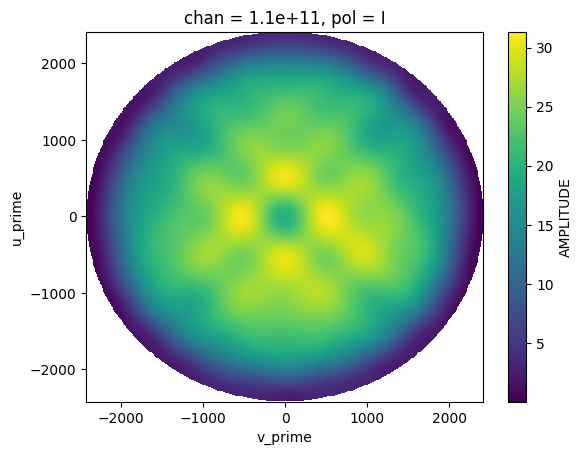

In [12]:
import matplotlib.pyplot as plt
plt.figure()
image_mds['ant_DA44']['ddi_0'].AMPLITUDE.sel(pol='I').plot()

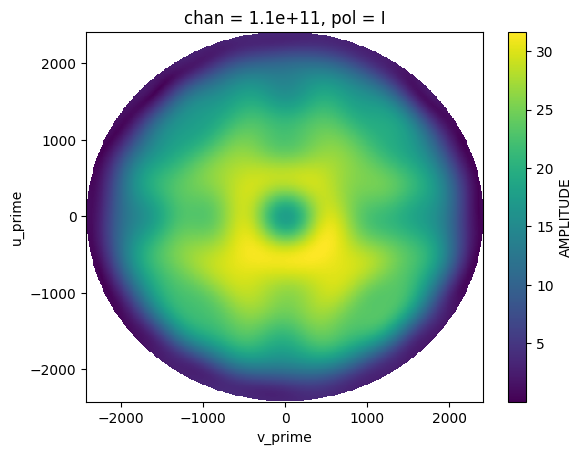

In [13]:
import matplotlib.pyplot as plt
plt.figure()
image_mds['ant_DV21']['ddi_0'].AMPLITUDE.sel(pol='I').plot()

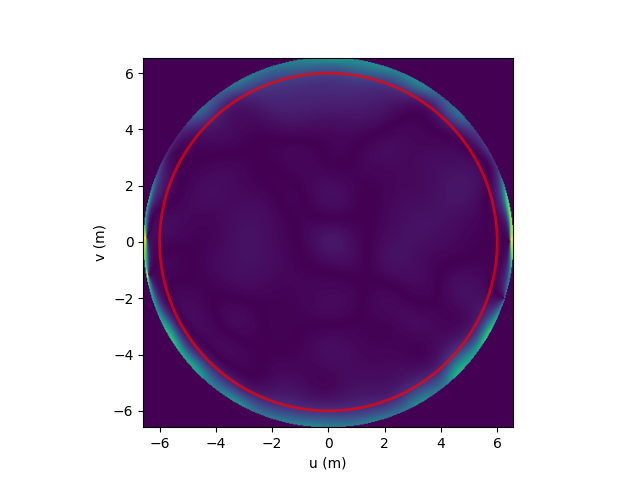

In [14]:
import xarray as xr
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy
import matplotlib.patches as patches
import scipy.constants

ds = image_mds['ant_DA44']['ddi_0']

wavelength = scipy.constants.speed_of_light/ds.chan.values[0]
u = ds.u_prime.values*wavelength
v = ds.v_prime.values*wavelength

circle = patches.Circle((0,0), 6, fill=False, color='red', alpha=0.7, linewidth=2)

fig, ax =plt.subplots()
plt.imshow(np.abs(ds.ANGLE[0,0,0,:,:]),extent=[u.min(), u.max(), v.min(), v.max()])
ax.add_patch(circle)
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.show()

# Panel

In [15]:
from astrohack.panel import panel
ddi = None
panel_model = 'rigid'

panel_mds = panel(
    image_name='/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.image.zarr', 
    panel_model='rigid',
    unit='mils', 
    parallel=True,
    overwrite=True
)

2023-04-12 11:44:00,796 - INFO     - astrohack - (_check_parms.py:115) - Setting default panel_name to /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.panel.zarr
2023-04-12 11:44:00,798 - INFO     - astrohack - (_check_parms.py:115) - Setting default sel_ddi to all
2023-04-12 11:44:00,799 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.panel.zarr will be overwritten.
2023-04-12 11:44:00,800 - INFO     - astrohack - (panel.py:114) - Processing ddi_0 for ant_DV15
2023-04-12 11:44:00,801 - INFO     - astrohack - (panel.py:114) - Processing ddi_0 for ant_DA54
2023-04-12 11:44:00,803 - INFO     - astrohack - (panel.py:114) - Processing ddi_0 for ant_DA59
2023-04-12 11:44:00,804 - INFO     - astrohack - (panel.py:114) - Processing ddi_0 for ant_DA53
2023-04-12 11:44:00,805 - INFO     - astrohack - (panel.py:114) - Processing ddi_0 for ant_DV12
2023-04-12 11:44:00,806 - INFO     - astrohack - (p

In [16]:
panel_mds.summary()

+----------+-----------+
| antenna  | ddi       |
+----------+-----------+
| ant_DA55 | ['ddi_0'] |
| ant_DV14 | ['ddi_0'] |
| ant_DA46 | ['ddi_0'] |
| ant_DV21 | ['ddi_0'] |
| ant_DA41 | ['ddi_0'] |
| ant_DV19 | ['ddi_0'] |
| ant_DV13 | ['ddi_0'] |
| ant_DA52 | ['ddi_0'] |
| ant_DA58 | ['ddi_0'] |
| ant_DV04 | ['ddi_0'] |
| ant_DA56 | ['ddi_0'] |
| ant_DV17 | ['ddi_0'] |
| ant_DA45 | ['ddi_0'] |
| ant_DV25 | ['ddi_0'] |
| ant_DA42 | ['ddi_0'] |
| ant_DV22 | ['ddi_0'] |
| ant_DA48 | ['ddi_0'] |
| ant_DA51 | ['ddi_0'] |
| ant_DV03 | ['ddi_0'] |
| ant_DA59 | ['ddi_0'] |
| ant_DA53 | ['ddi_0'] |
| ant_DV20 | ['ddi_0'] |
| ant_DV12 | ['ddi_0'] |
| ant_DV18 | ['ddi_0'] |
| ant_DV15 | ['ddi_0'] |
| ant_DA54 | ['ddi_0'] |
| ant_DA50 | ['ddi_0'] |
| ant_DV02 | ['ddi_0'] |
| ant_DA49 | ['ddi_0'] |
| ant_DA43 | ['ddi_0'] |
| ant_DV23 | ['ddi_0'] |
| ant_DV11 | ['ddi_0'] |
| ant_DV16 | ['ddi_0'] |
| ant_DA44 | ['ddi_0'] |
| ant_DV24 | ['ddi_0'] |
| ant_DA57 | ['ddi_0'] |
+----------+-----------+


In [17]:
panel_mds['ant_DA44']['ddi_0']

<xarray.Dataset>
Dimensions:             (u: 436, v: 436, labels: 120, pars: 3, screws: 5)
Coordinates:
  * labels              (labels) object '2-11' '1-11' '8-11' ... '3-52' '3-51'
  * pars                (pars) int64 0 1 2
  * screws              (screws) <U2 'il' 'ir' 'ol' 'or' 'c'
  * u                   (u) float64 -6.583 -6.552 -6.522 ... 6.492 6.522 6.552
  * v                   (v) float64 -6.583 -6.552 -6.522 ... 6.492 6.522 6.552
Data variables:
    AMPLITUDE           (u, v) float64 dask.array<chunksize=(218, 218), meta=np.ndarray>
    CORRECTIONS         (u, v) float64 dask.array<chunksize=(218, 218), meta=np.ndarray>
    DEVIATION           (u, v) float64 dask.array<chunksize=(218, 218), meta=np.ndarray>
    MASK                (u, v) bool dask.array<chunksize=(436, 436), meta=np.ndarray>
    PANEL_DISTRIBUTION  (u, v) int32 dask.array<chunksize=(218, 218), meta=np.ndarray>
    PANEL_PARAMETERS    (labels, pars) float64 dask.array<chunksize=(120, 3), meta=np.ndarray>
    PANEL_SCREWS        (labels, screws) float64 dask.array<chunksize=(120, 5), meta=np.ndarray>
    PHASE               (u, v) float64 dask.array<chunksize=(218, 218), meta=np.ndarray>
    PHASE_CORRECTIONS   (u, v) float64 dask.array<chunksize=(218, 218), meta=np.ndarray>
    PHASE_RESIDUALS     (u, v) float64 dask.array<chunksize=(218, 218), meta=np.ndarray>
    RESIDUALS           (u, v) float64 dask.array<chunksize=(218, 218), meta=np.ndarray>
Attributes: (12/13)
    AIPS:              False
    amp_unit:          V
    antenna_name:      DA44
    cutoff:            6.264889248212903
    input_gain:        107.01944579499491
    input_rms:         3.088073112958419e-05
    ...                ...
    output_rms:        4.996970214900966e-06
    panel_model:        rigid
    panel_margin:      0.2
    telescope_name:    ALMA DA
    theoretical_gain:  107.05251326572127
    wavelength:        0.002725520399528795

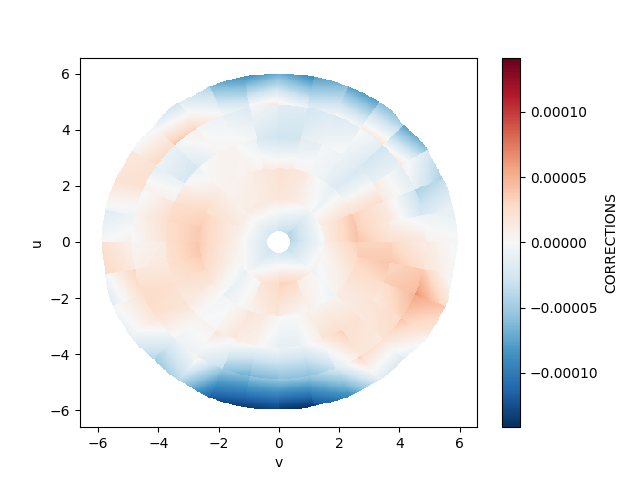

In [18]:
plt.figure()
panel_mds['ant_DA44']['ddi_0']['CORRECTIONS'].plot()

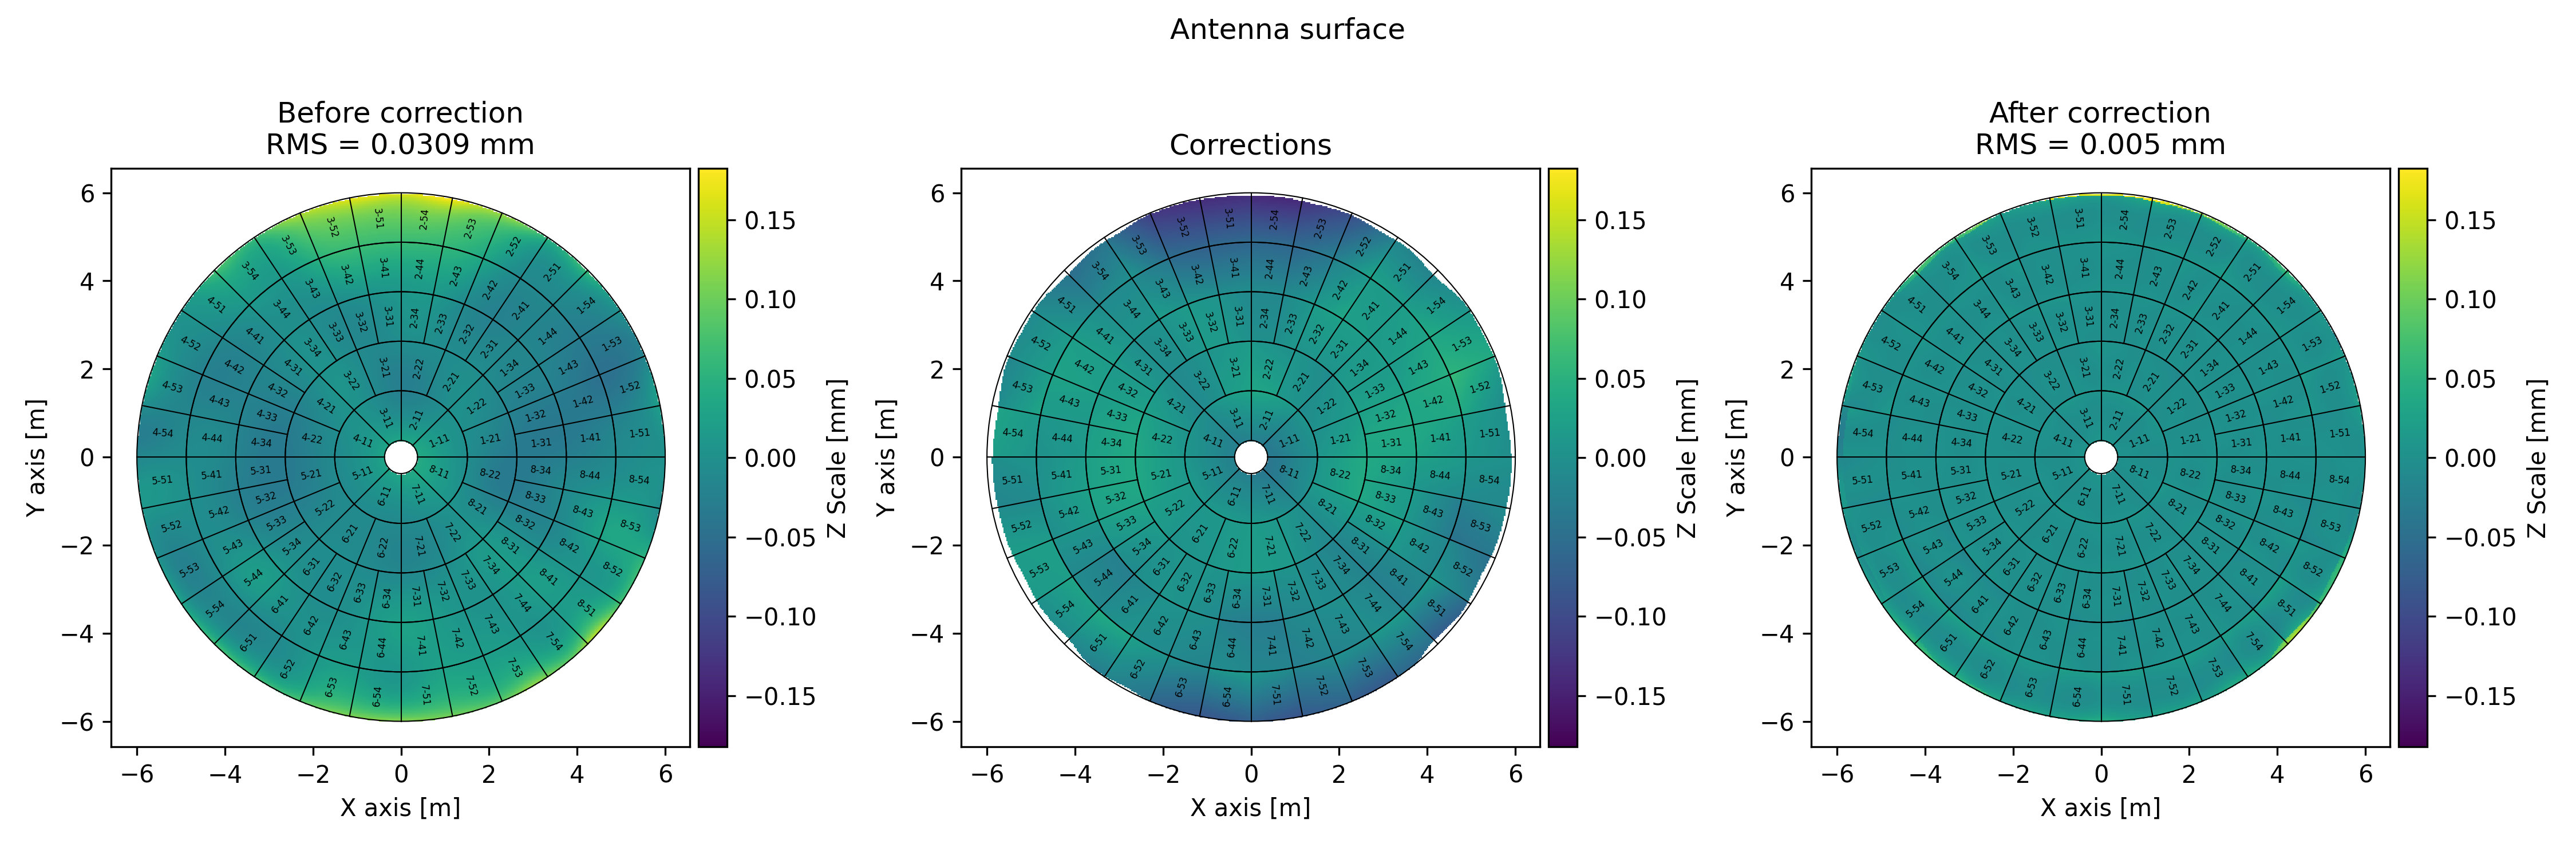

In [19]:
from IPython.display import Image
Image(filename = "/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.panel.zarr/ant_DA44/ddi_0/surface.png", width=1500, height=1500)

In [20]:
f = open('/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3.panel.zarr/ant_DA44/ddi_0/screws.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Screw adjustments for ALMA DA DA44 antenna
Adjustments are in mils


                         Inner Edge            Outer Edge            
     Ring    panel     left       right      left       right      
2-11       1.24       1.52      -0.64       0.36       0.52
1-11       1.71       1.63       0.31      -0.03       0.80
8-11       1.48       1.39       0.11      -0.19       0.59
7-11       1.30       1.00      -0.28      -1.34       0.04
6-11       0.88       1.13      -1.06       0.07       0.15
5-11       1.07       0.96       0.08      -0.39       0.35
4-11       0.94       0.95      -0.39      -0.38       0.19
3-11       0.97       1.00      -0.46      -0.42       0.18
2-22      -0.69      -0.47      -0.88      -0.49      -0.64
2-21      -0.49      -0.01      -0.31       0.52      -0.06
1-22       0.24      -0.54       0.39      -0.97      -0.23
1-21      -0.28      -0.36      -1.47      -1.62      -0.98
8-22      -0.32       0.07      -1.41      -0.74      -0.64
8-21      -0.